In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import seaborn as sns
import sqlalchemy as sql
import seaborn as sns

from sqlalchemy import create_engine

from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [16]:
string_connection = 'mysql+mysqlconnector://{user}:{password}@{server}/{database}'.format(
                    user='root',
                    password='125478',
                    server='127.0.0.1',
                    database='analise_risco')

cnx = sql.create_engine(string_connection)


In [17]:
dados_raw = pd.read_sql('select * from analise_risco.dados_modelo_ml', cnx)

dados_raw.head()

,pessoa_id,pessoa_idade,salario_ano,propriedade_sit,ano_trabalhado,motivo_emprestimo,pontuacao_emprestimos,vl_total,tx_juros,inadimplencia,tx_renda_divida,hst_inadimplencia,hst_primeiro_credito
0,283zsKkk-MN9S,23.000,108000.000,Hipotecada,5.000,Pagamento de débitos,D,10000.000,NaN,1.000,0.090,1.000,2
1,4tD36gcw-IrsA,31.000,35000.000,Hipotecada,2.000,Pagamento de débitos,B,10225.000,9.990,0.000,0.290,0.000,6
2,08iwXXZl-5U5x,22.000,14400.000,Própria,0.000,Pessoal,B,2100.000,11.140,0.000,0.150,0.000,4
3,0PtiPv5h-nd0L,21.000,47580.000,Hipotecada,5.000,Educativo,A,14000.000,6.030,0.000,0.290,0.000,2
4,3QKc0Idh-OAkE,33.000,115000.000,Hipotecada,10.000,Médico,B,25000.000,11.860,0.000,0.220,0.000,8


In [19]:
#Variaveis Categóricas

# propriedade_sit
# motivo_emprestimo
# pontuacao_emprestimos

colunas_categoricas = ['propriedade_sit',
                       'motivo_emprestimo', 'pontuacao_emprestimos']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
     colunas_categoricas),
    remainder='passthrough')

dados = one_hot_enc.fit_transform(dados_raw)

dados = pd.DataFrame(dados, columns=one_hot_enc.get_feature_names())
dados.head()


c:\Users\PauloVinicius\Documents\GitHub\AluraChallengeDataScience2\ambienteAluraChallengeDados\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,onehotencoder__x0_-,onehotencoder__x0_Alugada,onehotencoder__x0_Hipotecada,onehotencoder__x0_Outros,onehotencoder__x0_Própria,onehotencoder__x1_-,onehotencoder__x1_Educativo,onehotencoder__x1_Empreendimento,onehotencoder__x1_Melhora do lar,onehotencoder__x1_Médico,...,pessoa_id,pessoa_idade,salario_ano,ano_trabalhado,vl_total,tx_juros,inadimplencia,tx_renda_divida,hst_inadimplencia,hst_primeiro_credito
0,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,283zsKkk-MN9S,23.000,108000.000,5.000,10000.000,NaN,1.000,0.090,1.000,2
1,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,4tD36gcw-IrsA,31.000,35000.000,2.000,10225.000,9.990,0.000,0.290,0.000,6
2,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,08iwXXZl-5U5x,22.000,14400.000,0.000,2100.000,11.140,0.000,0.150,0.000,4
3,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0PtiPv5h-nd0L,21.000,47580.000,5.000,14000.000,6.030,0.000,0.290,0.000,2
4,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,...,3QKc0Idh-OAkE,33.000,115000.000,10.000,25000.000,11.860,0.000,0.220,0.000,8


In [20]:
# Analise das Variaveis Numéricas

# pessoa_idade
# salario_ano
# ano_trabalhado
# vl_total
# tx_juros
# tx_renda_divida
# hst_primeiro_credito

colunas_numericas = ["pessoa_idade",
"salario_ano",
"ano_trabalhado",
"vl_total",
"tx_juros",
"tx_renda_divida",
"hst_primeiro_credito"]

dados[colunas_numericas].describe()


,pessoa_idade,salario_ano,ano_trabalhado,vl_total,tx_juros,tx_renda_divida,hst_primeiro_credito
count,34165.000,34150.000,33231.000,34154.000,30859.000,34170.000,34485
unique,58.000,4295.000,36.000,753.000,348.000,77.000,29
top,23.000,60000.000,0.000,10000.000,10.990,0.100,2
freq,4079.000,1097.000,4317.000,2798.000,795.000,1615.000,6312


In [11]:
# histogramas = ['pessoa_idade', 'salario_ano',
#                'ano_trabalhado', 'hst_inadimplencia']
# histogramas = list(enumerate(histogramas))

# plt.figure(figsize=(30, 20))

# for i in histogramas:
#     plt.subplot(2, 2, i[0]+1)
#     sns.countplot(i[1], data=dados)
#     plt.title(i[1])
#     plt.xticks(rotation=45)


# Trabalhando com os Nulos.

  - Criar um Dataset sem nulos.
  - Criar um Dataset com os nulos tratados.


Dataset sem nulos:

In [ ]:
df_dados_semnulos = dados.dropna()

df_dados_semnulos.info()

Nulos Tratados

A idea é obter a mediana da variavel alvo atraves de agrupamento de outras variveis a qual não se possui valores nulos nas colunas.

In [13]:
# Para o segundo Dataset precisamos tratar estas colunas.
# pessoa_idade              320 Lista_GroupBY
# salario_ano               335 Lista_GroupBY
# ano_trabalhado           1254 Lista_GroupBY
# vl_total                  331 Exclusão
# tx_juros                 3626 Calcular
# inadimplencia             343 Separar 

# hst_inadimplencia         366 

In [23]:
# teste = dados.copy()

#duvida sobre hst_inadimplencia, se a media ou existe uma forma melhor de preencher.

# Para melhor desempenho remover mais os dados nulos ( challenge)

lista_groupby = ['pessoa_idade', 'salario_ano',
                 'ano_trabalhado', 'tx_juros', 'hst_inadimplencia']

for i in lista_groupby:
    dados[i].fillna(dados_raw.groupby(['propriedade_sit', 'motivo_emprestimo'])[i].transform('mean'), inplace=True)


# vl_total 331 nulos apenas, então irei excluir os registros
dados.dropna(axis=0,subset=['vl_total'], inplace=True)

# tx_renda_divida 315 por mais que seja pequeno o numero de nulos, é possível calcular.
dados.tx_renda_divida.fillna(dados.vl_total/dados.salario_ano, inplace=True)

# inadimplência             343
# Vou separar os dados nulos desta coluna para um dataset de predição, ja que no dicionario de dados consta como:
#possibilidade de inadimplência.

predicao = dados.copy(deep=True)
mask = pd.isnull(dados['inadimplencia'])
predicao = predicao[mask]

dados.dropna(axis=0,subset=['inadimplencia'], inplace=True)



In [ ]:
predicao.reset_index(drop=True, inplace=True)
predicao.info()

# Tratamento de Variaveis Numericas

# Variaveis Numéricas


In [25]:
df_numericos = dados[colunas_numericas].copy()

df_numericos.describe()

,pessoa_idade,salario_ano,ano_trabalhado,tx_juros,tx_renda_divida
count,33847.000,33847.000,33847.000,33847.000,33847.000
mean,27.732,66072.684,4.793,11.013,0.171
std,6.319,61323.660,4.073,3.072,0.108
min,20.000,4000.000,0.000,5.420,0.000
25%,23.000,39000.000,2.000,8.490,0.090
50%,26.000,55000.000,4.000,10.990,0.150
75%,30.000,79200.000,7.000,13.110,0.230
max,144.000,6000000.000,123.000,23.220,1.419


<AxesSubplot:xlabel='hst_primeiro_credito'>

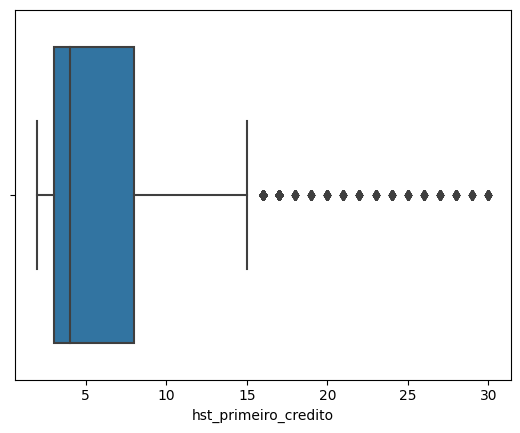

In [26]:
# for i in colunas_numericas:
#     plt.figure()
#     sns.boxplot(x=df_numericos[i])
    
sns.boxplot(x=df_numericos['hst_primeiro_credito'])


# Idade
 -pessoa_idade

<AxesSubplot:xlabel='pessoa_idade', ylabel='count'>

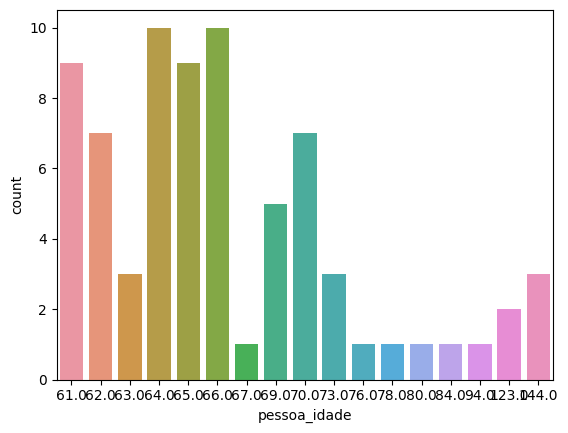

In [27]:
out = dados['pessoa_idade'].where(dados['pessoa_idade'] > 60)
sns.countplot(x=out)

In [28]:
#Apagar 2 pessoas acima de 100 anos
dados.drop(dados[dados["pessoa_idade"] > 86].index, inplace=True)

# Percebe-se que a idade se concentra entre 20 e 40 anos
# Teste sobre criar uma coluna de faixas etárias com intervalo de 5 anos.

faixa_etaria = [15, 20,25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
faixa_etaria_labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

dados['faixa_idade'] = pd.cut(
    x=dados['pessoa_idade'], bins=faixa_etaria, labels=faixa_etaria_labels)

predicao['faixa_idade'] = pd.cut(
    x=predicao['pessoa_idade'], bins=faixa_etaria, labels=faixa_etaria_labels)



# Salario Ano

In [31]:
dados['Faixa_Salarial'] = pd.qcut(dados['salario_ano'],  q=10, labels=False)

# predicao['Faixa_Salarial'] = pd.qcut(predicao['salario_ano'],  q=10, labels=False)


# Ano Trabalhado

<AxesSubplot:xlabel='ano_trabalhado', ylabel='count'>

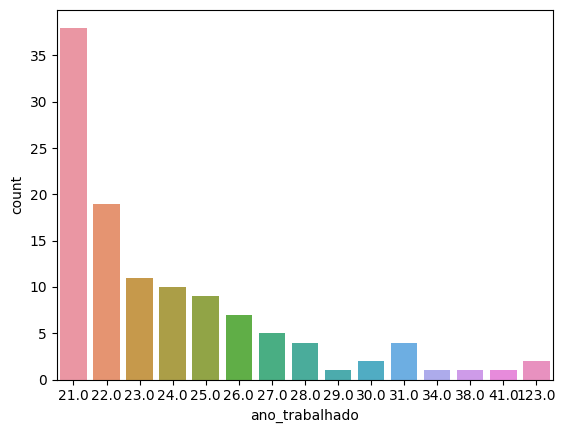

In [32]:
out = dados['ano_trabalhado'].where(dados['ano_trabalhado'] > 20)
sns.countplot(x=out)


In [33]:
dados.drop(
    dados[dados["ano_trabalhado"] > 50].index, inplace=True)


In [34]:
# out = predicao['ano_trabalhado'].where(predicao['ano_trabalhado'] > 20)
# sns.countplot(x=out)


ValueError: min() arg is an empty sequence

# Valor Total

<AxesSubplot:xlabel='vl_total', ylabel='count'>

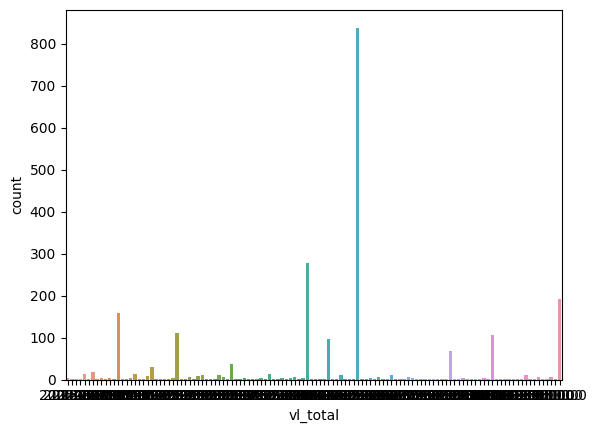

In [35]:
out = df_numericos['vl_total'].where(df_numericos['vl_total'] > 20000)
sns.countplot(x=out)


In [37]:
dados['Faixa_Emprestimo'] = pd.cut(x= dados['vl_total'], bins=35, labels=False)

# predicao['Faixa_Emprestimo'] = pd.cut(x=predicao['vl_total'], bins=35, labels=False)


<AxesSubplot:xlabel='Faixa_Emprestimo', ylabel='count'>

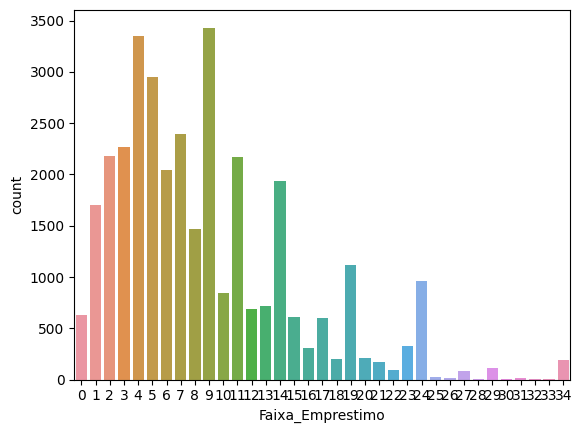

In [38]:
sns.countplot(x=dados['Faixa_Emprestimo'])

In [39]:
# sns.countplot(x=predicao['Faixa_Emprestimo'])

KeyError: 'Faixa_Emprestimo'

# Primeiro Credito

<AxesSubplot:xlabel='faixa_idade', ylabel='hst_primeiro_credito'>

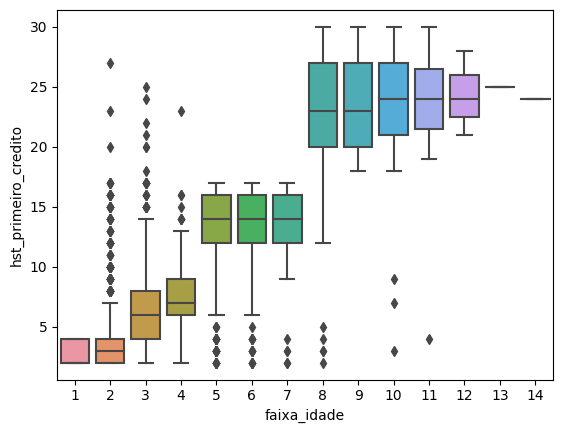

In [43]:

sns.boxplot(x=dados['faixa_idade'],
            y=dados['hst_primeiro_credito'])

# print(dados['pessoa_idade'].where(dados['faixa_idade'] == 2).unique())


In [44]:
dados.drop(dados[(dados["faixa_idade"] == 2) &(dados['hst_primeiro_credito'] > 20)].index, inplace=True)

In [45]:
dados.drop(dados[(dados["faixa_idade"] == 3) &(dados['hst_primeiro_credito'] > 25)].index, inplace=True)

<AxesSubplot:xlabel='faixa_idade', ylabel='hst_primeiro_credito'>

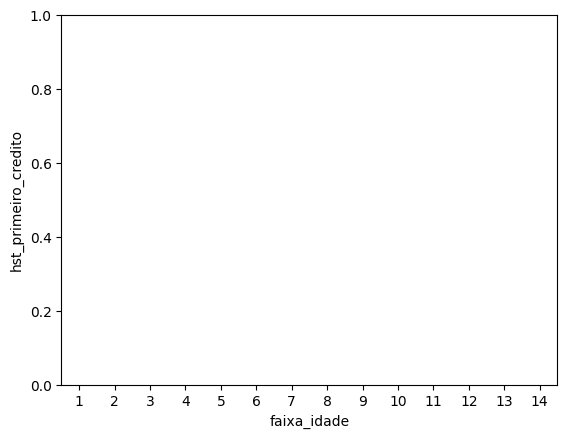

In [42]:
# sns.boxplot(x=predicao['faixa_idade'],
#             y=predicao['hst_primeiro_credito'])


In [25]:
predicao.drop(predicao[(predicao["faixa_idade"] == 2) &(predicao['hst_primeiro_credito'] > 20)].index, inplace=True)

In [26]:
predicao.drop(predicao[(predicao["faixa_idade"] == 3) &(predicao['hst_primeiro_credito'] > 25)].index, inplace=True)

# Finalizando
 - Exportando os datasets para a pasta Data, onde será lido pelo programa de treino e predição.
 

In [46]:
dados.describe()

dados.to_csv('Data/Dados.csv', index=False)

df_dados_semnulos.to_csv('Data/Dados_Sem_Nulos.csv', index=False)

# predicao necessita de tratamento das variaveis numericas.
predicao.to_csv('Data/Predicao.csv', index=False)